In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### The data

In [3]:
meta_data_samples = pd.read_table("../data/metadata.txt", sep=" ")
meta_data_males = meta_data_samples[(meta_data_samples['Sex'] == 'M') & (meta_data_samples['Genus'] == 'Papio')]

In [4]:
fs_out = pd.read_table("../steps/finestructure/test_run_linked.chunkcounts.out", sep=" ", header = 1, index_col = 0)

# Removing the prefix 'Sci_' from individual names so they match the names in the metadata file
fs_out.index = fs_out.index.str.replace('Sci_', '', regex=True) 
fs_out.columns = fs_out.columns.str.replace('Sci_', '', regex=True)

### Heatmap

In [5]:
pop_df = meta_data_males.set_index('PGDP_ID') # Making a df with the individual names as index 
species = pop_df['C_origin'] # Extracting the column with the 'C_origin'
species_reindexed = species.reindex(fs_out.index) # Reindexing this to match the data

In [6]:
fs_new = pd.merge(fs_out, species_reindexed, left_index=True, right_index=True)
fs_new = fs_new.set_index([fs_new.index, 'C_origin'])
fs_new = fs_new.sort_index(level='C_origin')
fs_new.index = fs_new.index.droplevel(1)
fs_new = fs_new.reindex(columns=list(fs_new.index))

In [7]:
species_reindexed = species.reindex(fs_new.index) # Reindexing this to match the data

Making a color mapping:

In [8]:
clusters = species_reindexed.unique()
palette = sns.color_palette("tab10")
color_mapping = dict(zip(clusters, palette))
cluster_colors = species_reindexed.map(color_mapping)

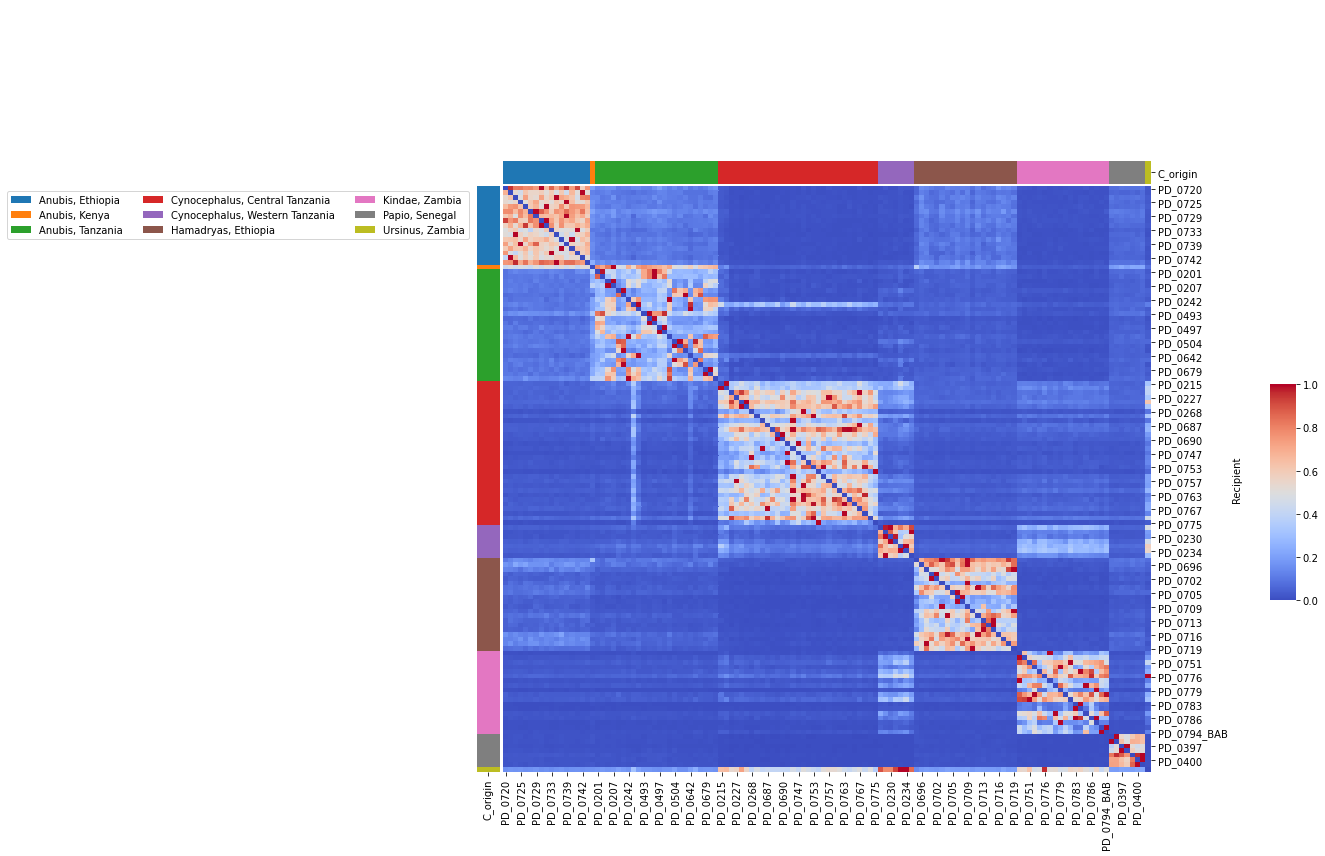

In [32]:
g = sns.clustermap(fs_new, cmap = 'coolwarm',
               row_colors=cluster_colors, col_colors=cluster_colors,
               row_cluster=False, col_cluster = False, # This is set to be false to preserve the order of the individuals
               standard_scale = 0, dendrogram_ratio=(.1, .2),
               cbar_pos=(1.02, .3, .03, .25), figsize=(12, 12))

for label in clusters:
    g.ax_row_dendrogram.bar(0, 0, color=color_mapping[label],
                            label=label, linewidth=0)

g.ax_row_dendrogram.legend(loc = 'upper right', ncol=3) #, bbox_to_anchor=(0.9, 0.5)
g.savefig('../figures/chromopainter_heatmap.pdf', bbox_inches='tight')